# <div align="center">GOOGLE PAGERANK PROBLEM</div>
## <div align="center">A descriptive study of the algorithm with a practical example of KFUPM's internal network.</div>
> <div align="center">- "The world’s largest matrix computation."</div>
<div align="center">Author: AMAAN IZHAR</div>

## <span style="color:#5534eb">Introduction</span>
With the advent of internet in 1990s and the webpages that got generated, there was a need of a search engine that could
provide/display the webpages relevant to the information that a user searched. However, the main problem was - what webpages to display? If there are 100 pages that were relevant to the user's information searched, then which ones to display and in what order? These queries gave birth to the pageranking algorithm i.e. ranking the webpages according to their probability of popularity. 


Hence, this project aims to describe the necessary definitions, mathematical background and equations required, python scripts, and a number of solutions through numerical analysis to solve the pageranking problem. Moreover, we will demonstrate the use of this algorithm on KFUPM's internal web network. 

## <span style="color:#5534eb">Definitions and Mathematical/Computational Models used</span>
Before we continue with the problem statement and solutions, we will define some methods/techniques/terminologies we will be using in our project.

- **Pagerank**: PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results. According to Google - PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.


- **Basic algorithm**: The PageRank value for a page **u** is dependent on the PageRank values for each page **v** contained in the set **B<sub>u</sub>** (the set containing all pages linking to page u), divided by the number **L(v)** (number of outbound links) of links from page **v**.


- **Damping Factor**: The PageRank theory holds that an imaginary surfer who is randomly clicking on links will eventually stop clicking. The probability, at any step, that the person will continue is a damping factor **d**. Various studies have tested different damping factors, but it is generally assumed that the damping factor will be set around **0.85**.


- **Computation models**: 
  1. ***Algebraic Flow Equations***: Linear equations are formed and then solved using the methods mentioned below.
      - ***Gauss Elimination Method***: Gaussian elimination, also known as row reduction, is an algorithm in linear algebra for solving a system of linear equations.
      - ***Basic Inverse Matrix Multiplication***: x = A<sup>-1</sup>b
  2. ***Power Method***: In this model, we use the initial adjacency matrix as **A**, PR matrix as **X**, and initial probability matrix as **b**. Hence, iteratively, we multiply **A**x**b** till the resultant matrix converge and that converged matrix is the resultant pageranks of all the webpages which were in matrix **X**.
  3. ***Networkx module***: It is a python library for finding pageranks of large networks/graphs. It handles all the dangling nodes as well as the probability distribution. The underlying implementation of the algorithm uses advanced concepts and complex mathematics that optimizes the power iteration method. 
  
  
- **Visualizations**: 
  1. *Bar graphs*
  2. *Pie charts* 
  3. *Graph networks*

## <span style="color:#5534eb">Pagerank - Problem Description</span>
On a webpage, there are many outgoing and incoming links. These links can be mined through their HTML code. Hence, we can create 
a directed graph with the webpages as nodes and the outgoing links as directed edges. Therefore, as an example, we get a graph as shown below.
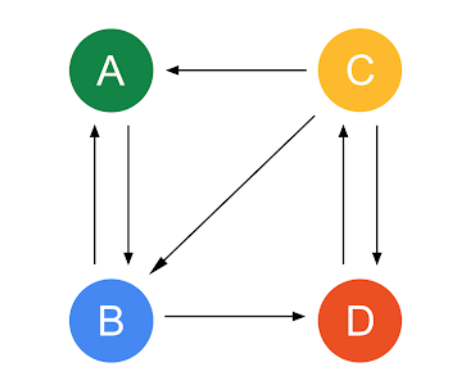

<div align="center"> Figure 1 </div>

Now, the question arises - How to take their popularity into account? How to sort the pages and what mathematics to use? All these questions are answered in the next section where we will provide various ways of finding the solution.

## <span style="color:#5534eb">Pagerank - Solutions using Different Methods</span>
To determine the pageranks of the the webpages A, B, C, and D, we will use the following methods.

### 1. Algebraic Flow Equations
Mathematically, as we can see from the Figure 1, we can generate the probability distributions as follows:
From page **A** -  1 outgoing link => P(A) = 1
From page **B** - 2 outgoing links => P(B) = 0.5
Similarly we can get P(C) and P(D). For **n** outgoing links, P(u) = 1/n.

Therefore, using the *Basic Algorithm* definition, we get

$\implies$ $PR(A) = \frac{PR(B)}{L(B)}+ \frac{PR(C)}{L(C)}+ \frac{PR(D)}{L(D)}$

In general form,

$\implies$ $PR(u) = \sum_{v \in B_u} \frac{PR(v)}{L(v)}$

$\therefore$ We can form equations as follows:


$P_A = \frac{P_B}{2} + \frac{P_C}{3}$

$P_B = P_A + \frac{P_C}{3}$

$P_C = P_D$

$P_D = \frac{P_B}{2} + \frac{P_C}{3}$

$\therefore$ In matrix form **Ax=b** we have

$$\begin{equation}
\begin{bmatrix}
0 & 0.5 & 0.33 & 0\\
1 & 0 & 0.33 & 0\\
0 & 0 & 0 & 1\\
0 & 0.5 & 0.33 & 0
\end{bmatrix}
%
\begin{bmatrix}
A\\
B\\
C\\
D
\end{bmatrix}
=
\begin{bmatrix}
?\\
?\\
?\\
?
\end{bmatrix}
\
\end{equation}
$$

As we can see there are a number of solutions to this matrix depending on the initial values in the matrix **b**. To keep it unique, we define a damping factor and a new form of equation.

$PR(A) = {1 - d \over N} + d \left( \frac{PR(B)}{L(B)}+ \frac{PR(C)}{L(C)}+ \frac{PR(D)}{L(D)}+\,\cdots \right)$

In general form,

$PR(p_i) = \frac{1-d}{N} + d \sum_{p_j \in M(p_i)} \frac{PR (p_j)}{L(p_j)}$

Therefore, after we apply some linear algebra rules, we get

$\mathbf{R} =  (\mathbf{I}-d \mathcal{M})^{-1}  \frac{1-d}{N}  \mathbf{1}$

Hence, now we have a well formulated mathematical equation and this can be solved using Gauss elimination method or matrix multiplication (inverse).
Thanks to python's in-built library, we can directly apply these methods and find the answers.
Let us see the rank in python code:

In [1]:
# Algebraic flow equations using Gauss elimination method and matrix multiplication.

import numpy as np

A = np.array([[0,0.5,0.33,0],
              [1,0,0.33,0],
              [0,0,0,1],
              [0,0.5,0.33,0]])

d = 0.85
iden_mat = np.identity(A.shape[0])
damping_factor_mul = np.multiply(A,0.85)
A_damped = np.subtract(iden_mat,damping_factor_mul)
b = ((1-d)/A.shape[0])*np.ones(A.shape[0]) 

R = np.linalg.solve(A_damped, b)

print('Pageranks using Gauss elimination:')
print(f'A = {R[0]*100:.4f}%\nB = {R[1]*100:.4f}%\nC = {R[2]*100:.4f}%\nD = {R[3]*100:.4f}%\n')

r = np.linalg.inv(A_damped).dot(b)
print('Pageranks using inverse matrix multiplication:')
print(f'A = {r[0]*100:.4f}%\nB = {r[1]*100:.4f}%\nC = {r[2]*100:.4f}%\nD = {r[3]*100:.4f}%\n')

Pageranks using Gauss elimination:
A = 22.8856%
B = 29.7112%
C = 23.2028%
D = 22.8856%

Pageranks using inverse matrix multiplication:
A = 22.8856%
B = 29.7112%
C = 23.2028%
D = 22.8856%



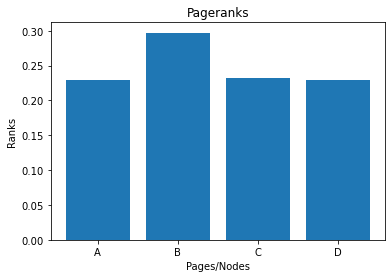

In [2]:
# Visualizing - Bar graph.

%matplotlib inline
import matplotlib.pyplot as plt

x = ['A', 'B', 'C', 'D']
y = [R[0], R[1], R[2], R[3]]
plt.bar(x, y)
plt.title('Pageranks')
plt.xlabel('Pages/Nodes')
plt.ylabel('Ranks')
plt.show()

Hence, we can see that Page **B** has the highest rank. 
Notice from the graph we can infer/deduce that ranks of pages **A**, **B**, and **D** would be same because of equal number of incoming links to each of them. However, through the damping algebraic formula, it was not the case. Therefore, the pagerank depends on quality of the incoming links (i.e. from which entity they are coming from). 


$\therefore$ Page **B** has the highest rank - evident from both numerical analysis methods used.

There is a major con in using the above method i.e. it is suitable only for a small set of webpages. What if we want to rank more than 4 webpages - 100 pages? Is there a faster computing method? Can we use other mathematical model/concept in determining the ranks of large datasets of webpages? 

To answer these questions, let us move to the next method.

### 2. Power Iteration Method 
For this method, pagerank has been formulated as a eigenvector problem. If we look at it from technical perspective, each incoming link increases the importance of a web page, therfore, we update the rank of each page by adding to the current value the importance of the incoming links. 

Mathematically, we are looking for a solution of this form - Ax = $\lambda$x (where $\lambda$=1).

$$\begin{equation}
\begin{bmatrix}
a & d & g \\
b & e & h \\
c & f & i \\
\end{bmatrix}
%
\begin{bmatrix}
A\\
B\\
C\\
\end{bmatrix}
=
\begin{bmatrix}
A\\
B\\
C\\
\end{bmatrix}
\
\end{equation}
$$

$\therefore$ To increase the efficiency of finding the solution, we use iterative method where we compute like this:

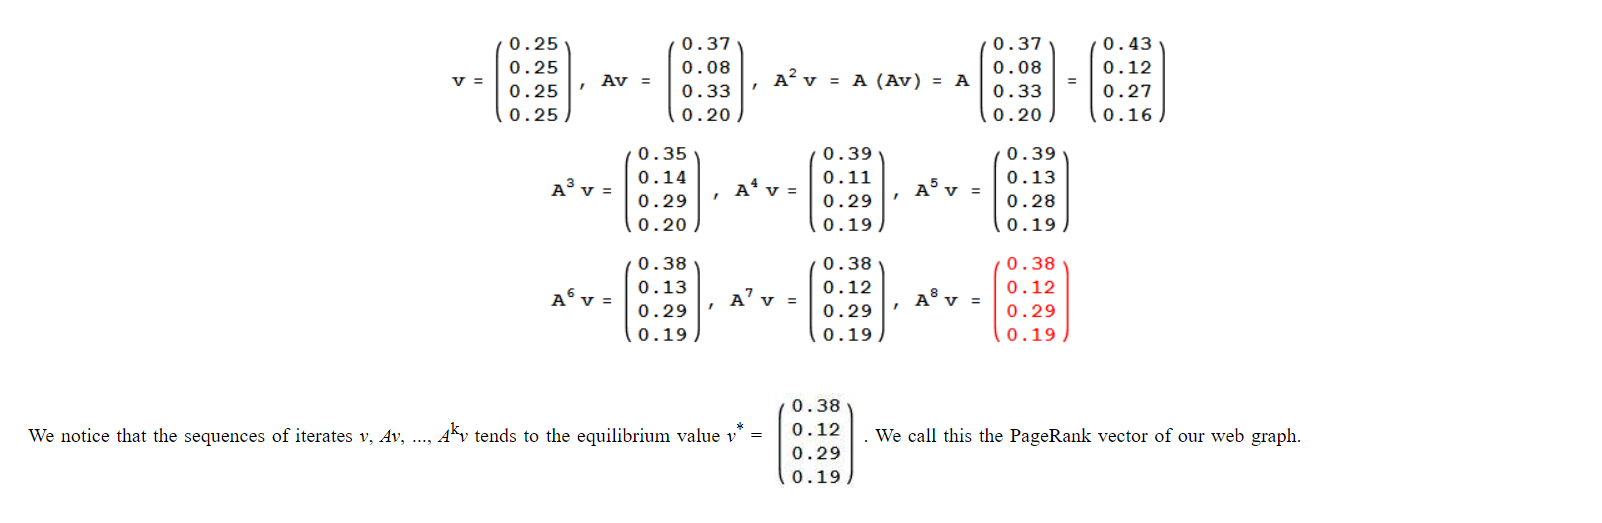
<div align="center"> Figure 2 </div>

Hence, let us look at the following example and try to find the ranks using python code.

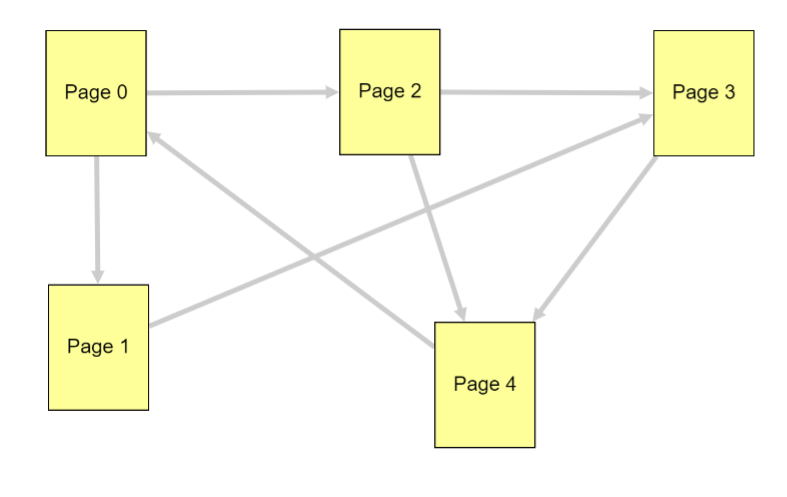
<div align="center"> Figure 3 </div>

In [3]:
# Power iteration method.

import numpy as np

def get_pagerank(A, n=100, d=0.85):
    N = A.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    A_hat = (d * A + (1 - d) / N)
    for i in range(n):
        v = A_hat @ v
    return v

# Matrix of Figure 3
A = np.array([[0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0.5, 0, 0],
              [0, 0, 0.5, 1, 0]])

r = get_pagerank(A, 100, 0.85)
r = r.transpose()

print('Pageranks using power iteration:')
print(f'A = {r[0][0]*100:.4f}%\nB = {r[0][1]*100:.4f}%\nC = {r[0][2]*100:.4f}%\nD = {r[0][3]*100:.4f}%\nE = {r[0][4]*100:.4f}%\n')

Pageranks using power iteration:
A = 25.4192%
B = 13.8032%
C = 13.8032%
D = 20.5990%
E = 26.3755%



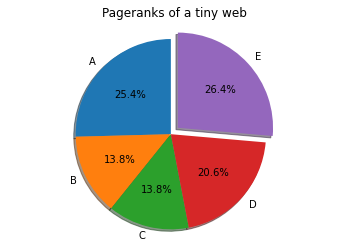

In [4]:
# Visualizing - Pie chart.

%matplotlib inline
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D', 'E']
ranks = [r[0][0], r[0][1], r[0][2], r[0][3], r[0][4]]
explode = (0,0,0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(ranks, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Pageranks of a tiny web')
plt.show()

The following video gives a perfect idea of how power iteration works.

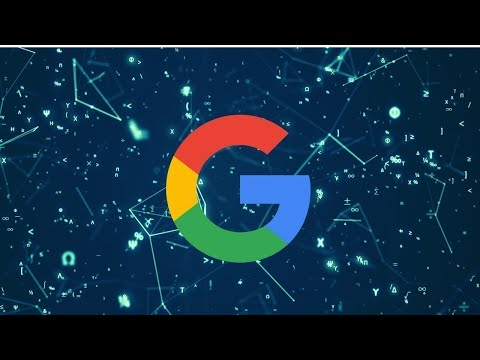

In [5]:
from IPython.display import YouTubeVideo
id = 'qxEkY8OScYY'
YouTubeVideo(id=id, width=500, height=400)

### 3. Networkx Library
Getting the probability distribution of incoming links, making a matrix manually, and taking care of dangling nodes is a tedious work! Hence, we have an in-built python library that does our job pretty easily. It is called networkx. 

Let us have a look at how to use this library with the help of the following example.

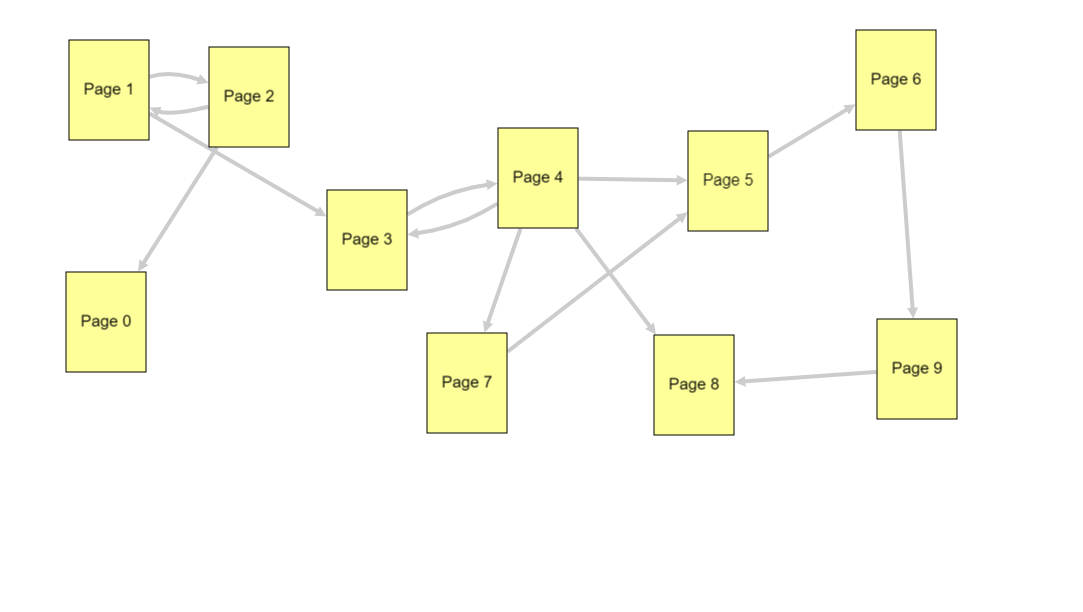
<div align="center"> Figure 4 </div>

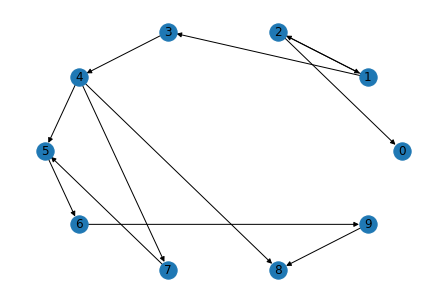

In [6]:
# Example using networkx module.
import networkx as nx

g = nx.DiGraph()

# Now we will add the nodes (10 nodes in total).
g.add_node(0)
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(4)
g.add_node(5)
g.add_node(6)
g.add_node(7)
g.add_node(8)
g.add_node(9)

# We will specify the edges as the Figure 3.
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,1)
g.add_edge(2,0)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(4,7)
g.add_edge(4,8)
g.add_edge(5,6)
g.add_edge(6,9)
g.add_edge(7,5)
g.add_edge(9,8)

# Drawing the graph.
nx.draw_circular(g, with_labels=True)

In [7]:
pr = nx.pagerank(g, alpha=0.85)
print('Pageranks are:')
print(pr)

Pageranks are:
{0: 0.06371265831864625, 1: 0.06371265831864625, 2: 0.06371265831864625, 3: 0.06371265831864625, 4: 0.09079071458241553, 5: 0.11536416358112075, 6: 0.13469458092045677, 7: 0.062358777176313114, 8: 0.1908159743273167, 9: 0.15112515613779198}


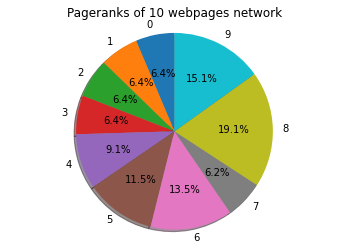

In [8]:
# Visualizing - Pie chart.

%matplotlib inline
import matplotlib.pyplot as plt

labels = [i for i in range(10)]
ranks = [r for r in pr.values()]
fig1, ax1 = plt.subplots()
ax1.pie(ranks, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Pageranks of 10 webpages network')
plt.show()

Let us show one last example using harvard500 dataset. Unfortunately, we could not get the dataset online. However, we can refer (references are listed below) results from matlab coded example.
After running the code, these were the results:
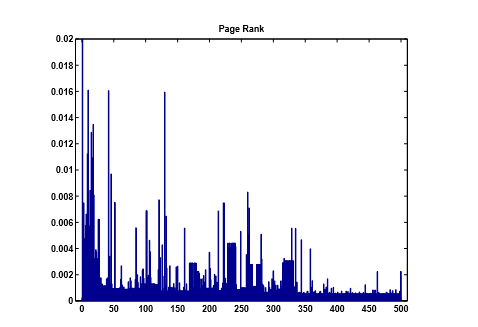
<div align="center"> Figure 5 </div>

## <span style="color:#5534eb">How is KFUPM Ranked?</span>
In this section, let us talk about the ranking of KFUPM on Google search. Whenever we type 'kfupm' in google search bar and hit ENTER key, we see a page somewhat as shown below:
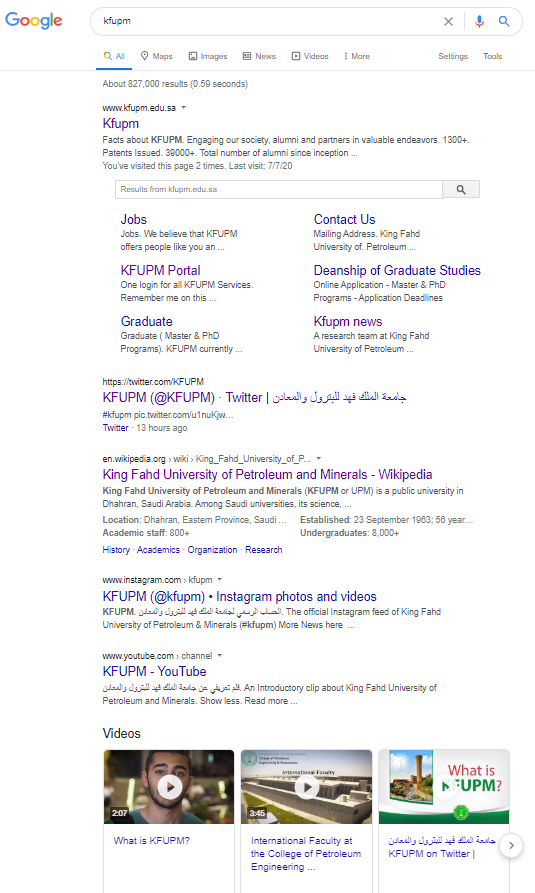
<div align="center"> Figure 6 </div>

With the knowledge and concepts of pagerank, we can develop a network of all the kfupm related links that we see on the 1st page of the search engine (see Figure 6). Hence, we will use only those links and mine the outgoing links of each page. It will be a hectic task as we cannot get a dataset which is ready-made but it will be worth the try. For mining, we will use intuition as well as some basic logic. 

We will use an online website to make the network and it will tell the pageranks of each page. As the website does not include interactive naming of webpages, we have given the encoding (names) of the webpages below.

- Page 0 - Kfupm main website
- Page 1 - Twitter Kfupm
- Page 2 - Wikipedia Kfupm
- Page 3 - Instagram Kfupm
- Page 4 - Linkedin Kfupm
- Page 5 - Youtube Kfupm

$\therefore$ We have in total 6 webpages that are linked to each other with the reference of 'kfupm'.
Given below is the graph of this tiny web along with their pageranks.

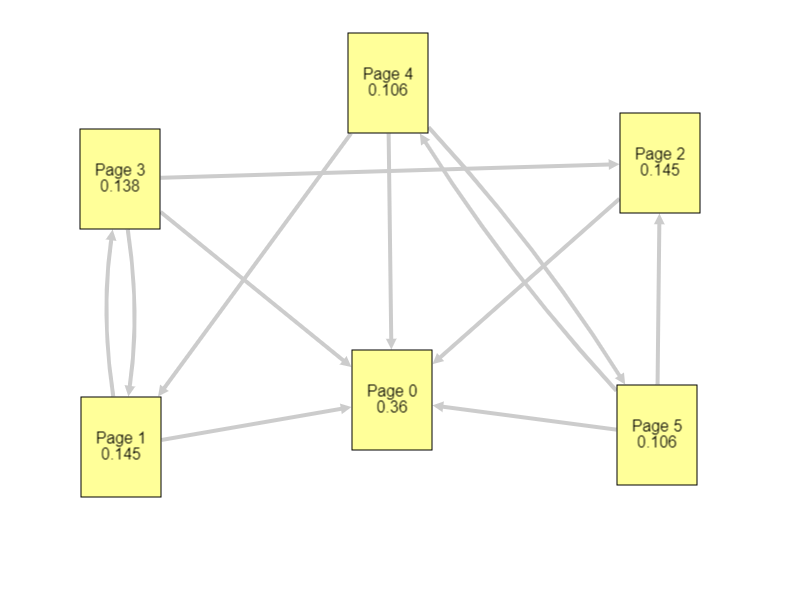
<div align="center"> Figure 7 </div>

**Aha! as expected, the main website is ranked number 1 and that is why it appears on top in the searched list.** However, the actual setting is different as there are many websites that are linked to each other. Furthermore, if there is a tie, then it seems that webpages are displayed based on quality of the link (such as more information, credibility etc.). For larger computations, we would need a stronger machine to compute the ranks. We used a small example just for educating how kfupm is ranked on web. 

Hope you liked this example!

## <span style="color:#5534eb">Rankings of KFUPM Internal Network</span>
Here is another interesting practical example surrounding KFUPM. We will make a web of all the internal websites used in Kfupm and then rank the websites. 
Given below is the list of the websites:
- Kfupm Main Website => http://www.kfupm.edu.sa/default.aspx#
- President => http://www.kfupm.edu.sa/Pages/President.aspx
- Vice Rectors => http://www.kfupm.edu.sa/Pages/Vice-Rectors.aspx
- Admission Office => www.kfupm.edu.sa/departments/admissions/SitePages/ar/default.aspx
- Deanship of Graduate studies => http://www.kfupm.edu.sa/deanships/dgs/Default.aspx
- Donate => https://alumni.kfupm.edu.sa/SitePages/en/Donate.aspx
- Female Education Department => http://www.kfupm.edu.sa/departments/fed/default.aspx
- Registrar => https://registrar.kfupm.edu.sa/
- Blackboard => https://blackboard.kfupm.edu.sa/
- Library => http://library.kfupm.edu.sa/
- Kfupm Eprints => https://eprints.kfupm.edu.sa/
- Careers => http://www.kfupm.edu.sa/Pages/Jobs.aspx
- Bidding System => https://bids.kfupm.edu.sa/
- Phone Directory => https://dalil.kfupm.edu.sa/en/
- Faculty => http://www.kfupm.edu.sa/pages/Faculty.aspx
- Staff => http://www.kfupm.edu.sa/pages/staff.aspx
- Alumni => http://alumni.kfupm.edu.sa/
- College of General Studies => http://www.kfupm.edu.sa/colleges/cass/default.aspx
- College of Engineering and Applied Engineering => http://www.kfupm.edu.sa/colleges/ces/default.aspx
- College of Computer Sciences and Engineering => http://www.kfupm.edu.sa/colleges/ccse/default.aspx
- College of Environmental Design => http://www.kfupm.edu.sa/colleges/ced/default.aspx
- College Industrial Management => http://cim.kfupm.edu.sa/
- College of Sciences => http://www.kfupm.edu.sa/colleges/cs/default.aspx
- College of Petroleum Engineering & Geosciences => https://cpg.kfupm.edu.sa/
- Research of Institute => http://ri.kfupm.edu.sa/

Now, we will write some code and compute the pageranks of each page and display it. For convenience, we will write short forms
of the website names.

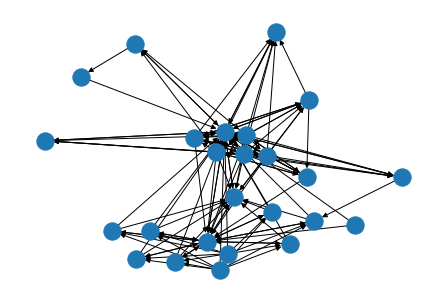

In [34]:
import networkx as nx

network_with_links = {'Main': ['AdmissionOffice', 'GraduateStudies', 'Donate', 'FEdDepartment', 'Registrar',
                               'Blackboard', 'Library', 'Eprints', 'Careers',
                               'BiddingSystem', 'PhoneDirectory'], 
                      'President': ['Main', 'AdmissionOffice', 'GraduateStudies', 'Donate', 'FEdDepartment', 
                                    'Registrar','Blackboard', 'Library', 'Eprints', 'Careers',
                                    'BiddingSystem', 'PhoneDirectory'],
                      'ViceRectors': ['Main', 'AdmissionOffice', 'GraduateStudies', 'Donate', 'FEdDepartment', 
                                      'Registrar','Blackboard', 'Library', 'Eprints', 'Careers','BiddingSystem', 
                                      'PhoneDirectory'],
                      'AdmissionOffice': ['Main', 'GraduateStudies', 'FEdDepartment', 'Registrar', 
                                          'Library', 'PhoneDirectory'],
                      'GraduateStudies': ['Main', 'AdmissionOffice', 'FEdDepartment', 'Registrar','Blackboard', 
                                          'Library', 'Eprints', 'Careers',
                                          'BiddingSystem', 'PhoneDirectory'],
                      'Donate': ['Main', 'Alumni'],
                      'FEdDepartment': ['Main', 'AdmissionOffice', 'Registrar','Blackboard', 'Library', 'Eprints', 'Careers',
                                        'BiddingSystem', 'PhoneDirectory'],
                      'Registrar': ['Main', 'AdmissionOffice', 'Eprints', 'PhoneDirectory',],
                      'Blackboard': ['Main', 'Registrar', 'Blackboard', 'Library'],
                      'Library': ['Main', 'Blackboard', 'Library', 
                                  'CGS', 'CEAE', 'CCSE', 'CED', 'CIM', 'CSC', 'CPEG'],
                      'Eprints': ['Main', 'President', 'ViceRectors', 'Library'],
                      'Careers': ['Main', 'CPEG'],
                      'BiddingSystem': ['Main'],
                      'PhoneDirectory': ['Main'],
                      'Faculty': ['Main', 'CGS', 'CEAE', 'CCSE', 'CED', 'CIM', 'CSC', 'CPEG', 'Staff'],
                      'Staff': ['Main', 'CGS', 'CEAE', 'CCSE', 'CED', 'CIM', 'CSC', 'CPEG', 'Faculty'],
                      'Alumni': ['Main'],
                      'CGS': ['Main', 'Blackboard', 'Library'],
                      'CEAE': ['Main', 'Blackboard', 'Library'],
                      'CCSE': ['Main', 'Blackboard', 'Library'],
                      'CED': ['Main', 'Blackboard', 'Library'],
                      'CIM': ['Main', 'Blackboard', 'Library'],
                      'CSC': ['Main', 'Blackboard', 'Library'],
                      'CPEG': ['Main', 'Blackboard', 'Library'],
                      'RI': ['Main', 'Library']}

g = nx.DiGraph(network_with_links)
nx.draw(g, with_labels=False)

In [32]:
pageranks = nx.pagerank(g, alpha=0.85)
print(pageranks)

{'Main': 0.22424793622786732, 'President': 0.015361091994256372, 'ViceRectors': 0.015361091994256372, 'AdmissionOffice': 0.044052575402483016, 'GraduateStudies': 0.03174498819352818, 'Donate': 0.025504260197357267, 'FEdDepartment': 0.0344432716407215, 'Registrar': 0.059280404825647365, 'Blackboard': 0.10157007723338232, 'Library': 0.11972189722380962, 'Eprints': 0.04405257540248302, 'Careers': 0.03145545768873329, 'BiddingSystem': 0.03145545768873329, 'PhoneDirectory': 0.050293303398653934, 'Faculty': 0.006625766871182453, 'Staff': 0.006625766871182453, 'Alumni': 0.01683919024276759, 'CGS': 0.017428084895261688, 'CEAE': 0.017428084895261688, 'CCSE': 0.017428084895261688, 'CED': 0.017428084895261688, 'CIM': 0.017428084895261688, 'CSC': 0.017428084895261688, 'CPEG': 0.030796377531384703, 'RI': 0.006000000000000001}


We have encoded the names with numbers for better representation on a bar graph.

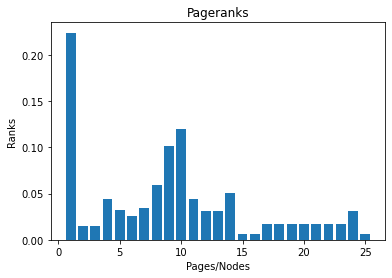

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [i for i in range(1,26)]
y = pageranks.values()
plt.bar(x, y)
plt.title('Pageranks')
plt.xlabel('Pages/Nodes')
plt.ylabel('Ranks')
plt.show()

$\therefore$ As we can see, in the internal network too, the main website is ranked number 1. Among the colleges, CPEG(College of Petroleum Engineering & Geosciences) is ranked the highest. The lowest 
ranked page is of the Research Institute. With this practical example, we saw how Kfupm's internal web network is ranked. Furthermore, we understood the mechanism of the pagerank algorithm. 

## <span style="color:#5534eb">Applications of Pagerank Algorithm</span>
1. Ranking Webpages.
2. Fraud detection.
3. For the analysis of protein networks in biology PageRank.
4. In any ecosystem, a modified version of PageRank may be used to determine species that are essential to the continuing health of the environment.
5. In neuroscience, the PageRank of a neuron in a neural network has been found to correlate with its relative firing rate.

## <span style="color:#5534eb">Conclusion</span>
We demonstrated the inner workings of the pagerank algorithm used by Google. We used visualizations to render the results in a beautiful format. Furthermore, we described the mathematical concepts behind the trillion dollar algorithm. Moreover, we listed some other applications of the pagerank problem. The key learning outcome was how numerical analysis can be used in solving these types of problem - and that came in handy. The most interesting part of this project was to be able to apply the algorithm on KFUPM and provide an insight of how this works internally.



## <span style="color:#5534eb">References</span>
- Cleve Molar, Experiments with MATLAB, Chapter 7.
- PageRank. (2020, June 16). Retrieved June 29, 2020, from https://en.wikipedia.org/wiki/PageRank
- Raluca Tanase, R. (n.d.). Lecture #3. Retrieved June 29, 2020, from http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html 
- King Fahd University of Petroleum and Minerals - http://www.kfupm.edu.sa/default.aspx